## 1. K-means Clustering

### Concept:
K-means clustering is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible.

### Implementation:
We'll implement K-means clustering using the Iris dataset.


<h3> Working on our own custom data </h3>

In [51]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

students=[chr(i+64) for i in range(1,100)]
math_marks=[random.randrange(1,100) for i in range(len(students))]
Science_marks=[random.randrange(1,100) for i in range(len(students))]
    
print(len(students),len(math_marks),len(Science_marks))
data_frame=pd.DataFrame({
    'Names': students,
    'Maths': math_marks,
    'Science': Science_marks
})

display(data_frame)

99 99 99


,Names,Maths,Science
0,A,30,37
1,B,95,21
2,C,21,6
3,D,45,52
4,E,73,79
...,...,...,...
94,,25,35
95,,83,58
96,¡,96,73
97,¢,90,84


Text(0, 0.5, 'Science')

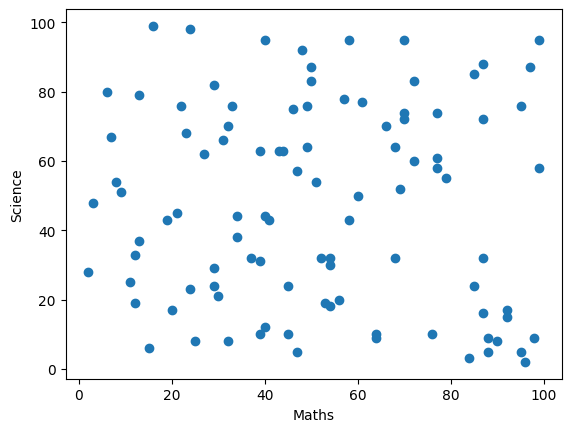

In [49]:
plt.scatter(data_frame['Maths'],data_frame['Science'])
plt.xlabel('Maths')
plt.ylabel("Science")


In [54]:
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model
kmeans.fit(data_frame[['Maths','Science']])

# Add the cluster labels to the DataFrame
data_frame['Cluster'] = kmeans.labels_

display(data_frame)

,Names,Maths,Science,Cluster
0,A,30,37,2
1,B,95,21,3
2,C,21,6,2
3,D,45,52,0
4,E,73,79,1
...,...,...,...,...
94,,25,35,2
95,,83,58,1
96,¡,96,73,1
97,¢,90,84,1


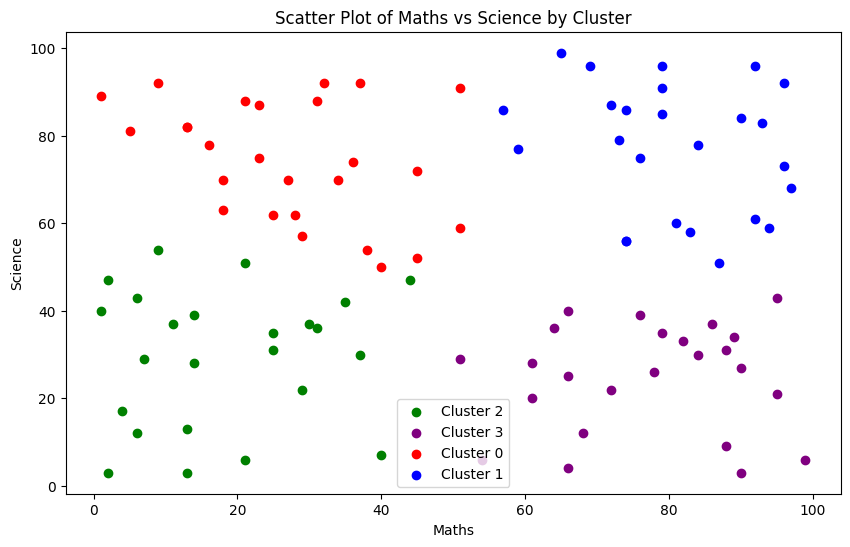

In [55]:
# Define colors for each cluster
colors = {0: 'red', 1: 'blue',2:'green',3:'purple'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for cluster in data_frame['Cluster'].unique():
    subset = data_frame[data_frame['Cluster'] == cluster]
    plt.scatter(subset['Maths'], subset['Science'], color=colors[cluster], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Maths')
plt.ylabel('Science')
plt.title('Scatter Plot of Maths vs Science by Cluster')
plt.legend()
plt.show()

<h3> Working on IRIS Dataset </h3>

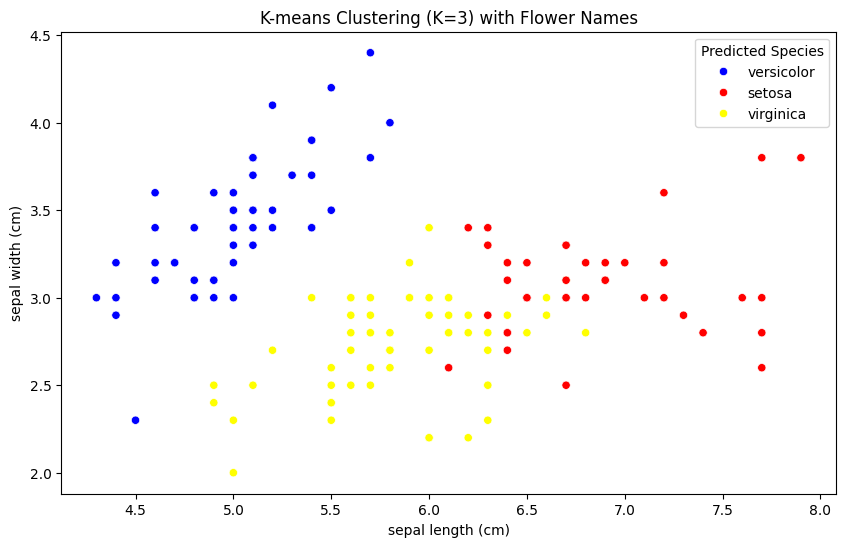

In [4]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(df)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Map cluster labels to actual species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['Predicted Species'] = df['Cluster'].map(species_map)

# Define a custom palette with distinct colors for each species
custom_palette = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'yellow'}

# Visualize the clusters with actual species names and distinct colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Predicted Species', data=df, palette=custom_palette)
plt.title('K-means Clustering (K=3) with Flower Names')
plt.show()


## 2. Principal Component Analysis (PCA)

### Concept:
Principal Component Analysis (PCA) is a dimensionality reduction technique that is often used to reduce the dimensionality of large datasets, by transforming the data into a new set of variables, the principal components, which are orthogonal (uncorrelated) and ordered by the amount of original variance they retain.

### Implementation:
We'll implement PCA using the Iris dataset.

### Expalantion Video: 

https://www.youtube.com/watch?v=FgakZw6K1QQ


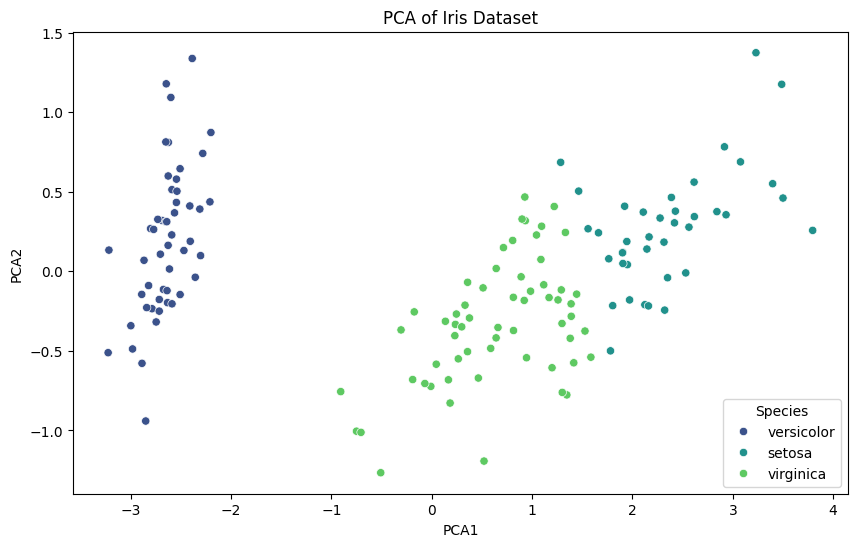

In [12]:
# Import necessary libraries
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and has only numerical data except 'Cluster' and 'Predicted Species'

# Drop non-numeric columns (like 'Cluster' and 'Predicted Species') for PCA
df_numeric = df.drop(columns=['Cluster', 'Predicted Species'], axis=1)

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(df_numeric)

# Create a DataFrame for the PCA result
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Add the species names to the PCA DataFrame
df_pca['Species'] = df['Predicted Species']

# Visualize the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Species', data=df_pca, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.show()


## 4. t-SNE for High-Dimensional Data Visualization

### Concept:
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a machine learning algorithm for visualization. It is a non-linear dimensionality reduction technique that is particularly well suited for embedding high-dimensional data into a space of two or three dimensions.

### Implementation:
We'll implement t-SNE using the Iris dataset.

### Explanation Video: 

https://www.youtube.com/watch?v=NEaUSP4YerM


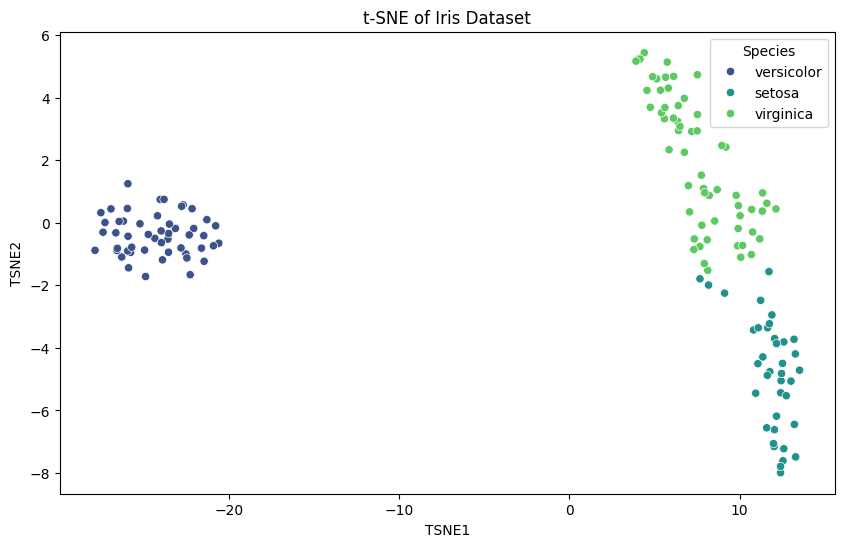

In [11]:
# Import necessary libraries
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and has only numerical data except 'Cluster' and 'Predicted Species'

# Drop non-numeric columns (like 'Cluster' and 'Predicted Species') for t-SNE
df_numeric = df.drop(columns=['Cluster', 'Predicted Species'], axis=1)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_result = tsne.fit_transform(df_numeric)

# Create a DataFrame for the t-SNE result
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Add the species names to the t-SNE DataFrame
df_tsne['Species'] = df['Predicted Species']

# Visualize the t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Species', data=df_tsne, palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.show()
